In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# Importing the dataset
dataset_original = pd.read_csv('Salary_Data.csv')
dataset = dataset_original.copy()
print(dataset)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [3]:
dataset.info()
print('Dataset shape: ', dataset.shape, sep="") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
Dataset shape: (30, 2)


In [4]:
# Finding how many missing data are there in the dataset
total = dataset.isnull().sum().sort_values(ascending=False)
percent = round(((dataset.isnull().sum() / dataset.isnull().count())*100),2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Missing values', '% of Total values'])
missing_data

,Missing values,% of Total values
Salary,0,0.0
YearsExperience,0,0.0


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

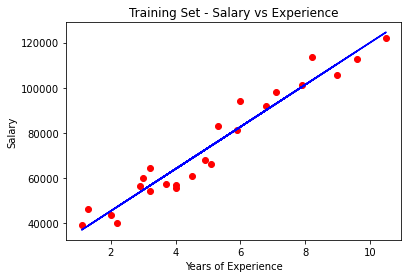

In [8]:
# Visualize the training set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color ='blue')
plt.title('Training Set - Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

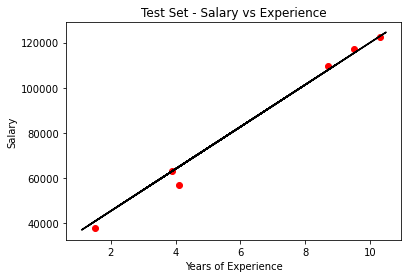

In [9]:
# Visualize the test set
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color ='black')
plt.title('Test Set - Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [10]:
# Predicting for 12
print("%.2f" %(regressor.predict([[12]])))

138531.00


In [11]:
# coefficient of determination R^2 of the prediction
print("Score: ", regressor.score(X_train, y_train), sep="")
# an array of weights estimated by linear regression
# contain the coefficients for the prediction of each target
print("Model slope: ",  regressor.coef_, sep="")
# Independent term in the linear model
print("Model intercept: ", regressor.intercept_, sep="")

Score: 0.9411949620562126
Model slope: [9312.57512673]
Model intercept: 26780.09915062818


In [12]:
# Linear Reg equation
coef = regressor.coef_[0]
intercept = regressor.intercept_
print("Simple Linear Regression equation is: ", end="")
print("Salary = " + str(intercept) +  " + " + str(coef) + " * Experience")
print("Salary = + %.2f + %.2f * Experience" %(coef, intercept))


Simple Linear Regression equation is: Salary = 26780.09915062818 + 9312.575126729189 * Experience
Salary = + 9312.58 + 26780.10 * Experience
